In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [5]:
df=yf.Ticker("^GSPC")
df=df.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [6]:
df.shape

(24162, 7)

In [7]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<Axes: xlabel='Date'>

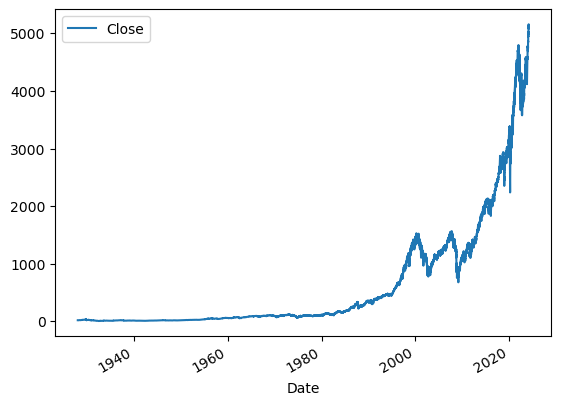

In [8]:
df.plot(y='Close')

In [9]:
# our target is will the stock go up or down

del df['Dividends']
del df['Stock Splits']

In [10]:
df.shape

(24162, 5)

In [11]:
df['Tomorrow']=df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [12]:
df['Target']=(df['Tomorrow']>df['Close']).astype(int)
df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [13]:
df=df.loc['1990-01-01':].copy()
df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [14]:
df.shape

(8612, 7)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=101)

train=df.iloc[:-100]
test=df.iloc[-100:]

predictors=['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=101)

In [16]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])
preds

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
precision_score(test['Target'],preds)

0.5384615384615384

In [18]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name='Predictions')
    combined=pd.concat([test['Target'],preds],axis=1)
    return combined

In [19]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [20]:
predictions=backtest(df,model,predictors)

In [21]:
predictions['Predictions'].value_counts()

Predictions
0    3439
1    2673
Name: count, dtype: int64

In [22]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5327347549569772

In [23]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.534849
0    0.465151
Name: count, dtype: float64

In [24]:
horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
    rolling_averages=df.rolling(horizon).mean()
    
    ratio_column=f"Close_Ratio_{horizon}"
    df[ratio_column]=df['Close'] / rolling_averages['Close']
    
    trend_column=f"Trend_{horizon}"
    df[trend_column]=df.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors+=[ratio_column,trend_column]
    

In [25]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df=df.dropna()
df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [27]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=100,random_state=101)


In [28]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds=pd.Series(preds,index=test.index,name='Predictions')
    combined=pd.concat([test['Target'],preds],axis=1)
    return combined

In [29]:
predictions=backtest(df,model,new_predictors)

In [30]:
predictions['Predictions'].value_counts()

Predictions
0.0    4409
1.0     702
Name: count, dtype: int64

In [31]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5726495726495726